In [18]:
import random
import time
from matplotlib import pyplot as plt 
from search import *

In [19]:

class Graph:
    def __init__(self):
        self.adj_list = {}

    def add_node(self, node):
        if node not in self.adj_list:
            self.adj_list[node] = {}

    def add_edge(self, src, dest, weight):
        if src not in self.adj_list:
            self.adj_list[src] = {}
        if dest not in self.adj_list:
            self.adj_list[dest] = {}
        self.adj_list[src][dest] = weight
        self.adj_list[dest][src] = weight

    def remove_node(self, node):
        try:
            adjacents = list(self.adj_list[node].keys())
            del self.adj_list[node]
            for neighbor in adjacents:
                del self.adj_list[neighbor][node]
            return f"DELETED {node}"
        except KeyError:
            print("Node not found.")

    def remove_edge(self, src, dest):
        if src in self.adj_list and dest in self.adj_list[src]:
            del self.adj_list[src][dest]
            del self.adj_list[dest][src]
            return f"Deleted edge {dest} from {src}"
        else:
            return False



    def get_neighbors(self, node):
        return self.adj_list.get(node, {})


In [20]:
def load_data(graph, file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                src, dest, weight = line.strip().split()
                graph.add_edge(src, dest, weight)

graph = Graph()
file_path = "cities_weight_data.txt"
load_data(graph, file_path)

# Adding Nodes and edges
graph.add_node("Addis Ababa")
graph.add_edge("Addis Ababa","Adama",100)
graph.add_edge("Addis Ababa","Holota",120)


In [21]:
print(graph.get_neighbors("Addis Ababa"))

{'Adama': 100, 'Holota': 120}


In [22]:
print(graph.remove_edge("Addis Ababa", "Holota"))

Deleted edge Holota from Addis Ababa


In [23]:
print(graph.get_neighbors("Addis Ababa"))
print(graph.remove_node("Addis Ababa"))

{'Adama': 100}
DELETED Addis Ababa


In [25]:
search = Search()
print(search.dfs(graph,"Drobeta","Bucharest"))
print(search.bfs(graph,"Drobeta","Bucharest"))

['Drobeta', 'Craiova', 'RimnicuVilcea', 'Sibiu', 'Fagaras', 'Bucharest']
['Drobeta', 'Craiova', 'Pitesti', 'Bucharest']


defaultdict(<function benchmark_algorithms.<locals>.<lambda> at 0x79ec68f87d00>, {10: defaultdict(<class 'list'>, {0.2: [(['Pitesti', 'Craiova', 'Drobeta'], 0.05125999450683594), (['Urziceni', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia'], 0.08344650268554688), (['Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara'], 0.06556510925292969), (['Hirsova', 'Urziceni', 'Bucharest', 'Pitesti'], 0.03314018249511719), (['Pitesti', 'Bucharest', 'Urziceni', 'Hirsova', 'Eforie'], 0.06747245788574219), (['Neamt', 'Iasi', 'Vaslui', 'Urziceni', 'Bucharest', 'Fagaras', 'Sibiu', 'Oradea', 'Zerind'], 0.07534027099609375), (None, 0.07581710815429688), (None, 0.00762939453125), (['Timisoara', 'Arad'], 0.013828277587890625), (['RimnicuVilcea', 'Pitesti', 'Bucharest', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt'], 0.08273124694824219)], 0.4: [(['Timisoara', 'Arad', 'Sibiu', 'Fagaras'], 0.037670135498046875), (['Lugoj', 'Timisoara', 'Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Giurgiu'], 0.0600814819335937

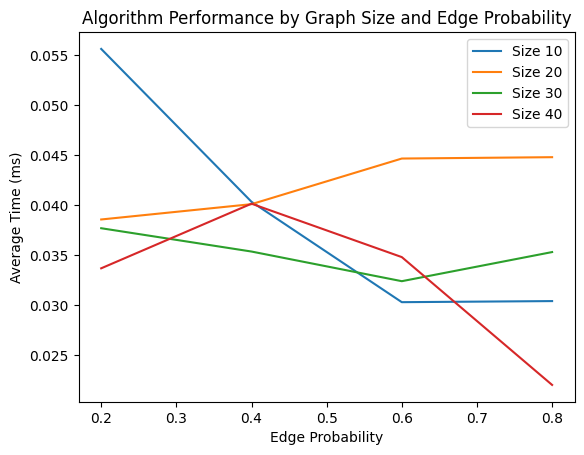

In [28]:
from collections import defaultdict

def benchmark_algorithms():
    graph_sizes = [10, 20, 30, 40]
    edge_probs = [0.2, 0.4, 0.6, 0.8]
    results = defaultdict(lambda: defaultdict(list))

    for size in graph_sizes:
        for prob in edge_probs:
            
            for _ in range(10):  
                start_node = random.choice(list(graph.adj_list.keys()))
                goal_node = random.choice(list(graph.adj_list.keys()))
                if start_node == goal_node:
                    continue

                # Measure BFS
                start_time = time.time()
                bfs_path = search.bfs(graph, start_node, goal_node)
                bfs_time = (time.time() - start_time) * 1000  
                results[size][prob].append((bfs_path, bfs_time))

    # print random graph sizes and edge probabilities
    print(results)
    for size, probs in results.items():
        times = [sum(data[1] for data in times) / len(times) for prob, times in probs.items()]
        plt.plot(edge_probs, times, label=f'Size {size}')
    plt.legend()
    plt.xlabel('Edge Probability')
    plt.ylabel('Average Time (ms)')
    plt.title('Algorithm Performance by Graph Size and Edge Probability')
    plt.show()

benchmark_algorithms()
